In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
word_dict = imdb.get_word_index()

def code_text(text):
    text = text.lower().split()
    return [word_dict.get(word, 0) for word in text]


def decode_text(vector):
    reverse_dict = dict([(key, word) for (word, key) in word_dict.items()])
    return " ".join([reverse_dict.get(number, "?") for number in vector])


def vectorized(vector):
    result = np.zeros((len(vector), 15000))
    for q, num in enumerate(vector):
        result[q, num] = 1
    
    return result

In [3]:
epochs = 10
batch_size = 32
learning_rate = 0.001

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=15000)

x_train = vectorized(x_train)
x_test = vectorized(x_test)

In [5]:
input_lay = Input(15000)
x = Dense(16, activation="relu")(input_lay)
x = Dense(16, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_lay, output)

In [6]:
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss="binary_crossentropy", metrics="acc")

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data = (x_test, y_test))

Epoch 1/10
782/782 [==============================] - 10s 11ms/step - loss: 0.3139 - acc: 0.8711 - val_loss: 0.2916 - val_acc: 0.8831
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2002 - acc: 0.9240 - val_loss: 0.2995 - val_acc: 0.8836
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1643 - acc: 0.9391 - val_loss: 0.3358 - val_acc: 0.8761
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1419 - acc: 0.9482 - val_loss: 0.3586 - val_acc: 0.8752
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1250 - acc: 0.9565 - val_loss: 0.3888 - val_acc: 0.8719
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1109 - acc: 0.9616 - val_loss: 0.4374 - val_acc: 0.8653
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1000 - acc: 0.9664 - val_loss: 0.4648 - val_acc: 0.8653
Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss: 

Text(0, 0.5, 'accuracy')

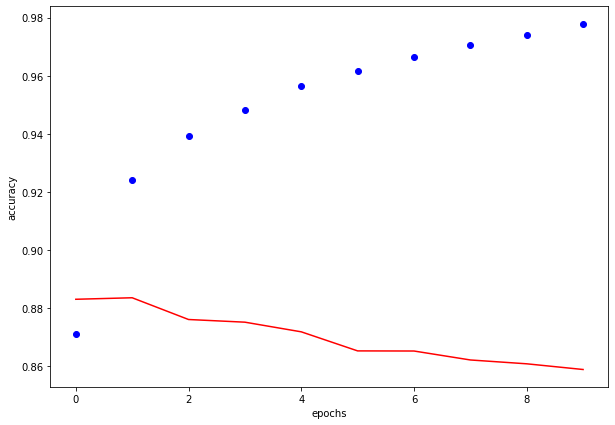

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(epochs), history.history["acc"], "bo")
plt.plot(range(epochs), history.history["val_acc"], "r")
plt.xlabel("epochs")
plt.ylabel("accuracy")